## Lasso回归和岭回归

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error,r2_score

#### 定义样本和特征数量

mean_square_error:1.09
Coefficient of determination: 0.90
Coefficient of the model:-2.93
intercept of the model:4.34


C:\Users\31561\AppData\Local\Temp\ipykernel_17808\44999033.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("intercept of the model:%.2f" % reg.intercept_)


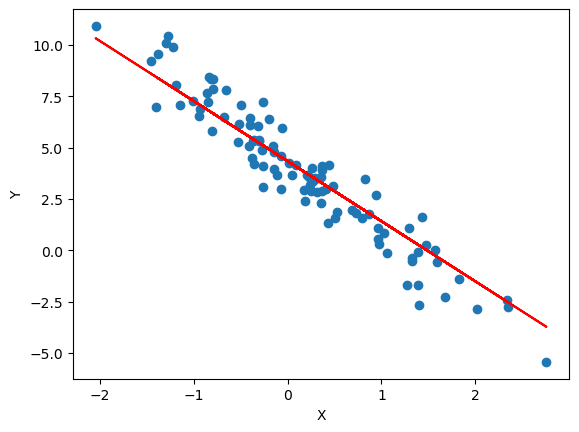

In [20]:
# 设置随机种子以确保结果可复现
np.random.seed(0)

num_sample = 1000
num_feature = 1
weight = -3.4
b_true = 4.3
feature = np.random.normal(size=(num_sample, num_feature))
label = weight * feature + b_true + np.random.normal(size=(num_sample, num_feature))

# 分割数据为训练集和测试集
X_train = feature[:-100, :]
X_test = feature[-100:, :]

# 分割目标变量为训练集和测试集
y_train = label[:-100]
y_test = label[-100:]

# 创建并拟合Lasso回归模型
reg = Lasso(alpha=0.5, fit_intercept=True)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

# 计算并打印均方误差和决定系数
print("mean_square_error:%.2f" % mean_squared_error(y_test, y_predict))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_predict))

# 打印模型系数和截距，确保提取单个元素
print("Coefficient of the model:%.2f" % reg.coef_[0])
print("intercept of the model:%.2f" % reg.intercept_)

# 绘制测试数据的散点图和模型预测的直线
ax = plt.subplot(111)
ax.scatter(X_test, y_test)
ax.plot(X_test, y_predict, color='red')  # 指定线条颜色
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()